In [ ]:
import numpy as np
import tensorflow as tf
import csv
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import ast
import json
import re
from google.colab import drive
import torch
import torch.nn as nn



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Load data from .npy file
data= np.load("/content/drive/MyDrive/WP-train.npy", allow_pickle=True)[()]

In [ ]:
data[1:10]

array([{'id': 'WP-0_SR', 'question': 'In thirteen letters, how do you spell COW?', 'answer': 'SEE O DOUBLE YOU.', 'distractor1': 'COWCOWCOWCOWW', 'distractor2': 'SEE OH DEREFORD', 'distractor(unsure)': 'None of above.', 'label': 2, 'choice_list': ['SEE OH DEREFORD', 'COWCOWCOWCOWW', 'SEE O DOUBLE YOU.', 'None of above.'], 'choice_order': [2, 1, 0, 3]},
       {'id': 'WP-0_CR', 'question': 'How do you spell COB in seven letters?', 'answer': 'SEE O BEE', 'distractor1': 'COBCOBB', 'distractor2': 'COBBLER', 'distractor(unsure)': 'None of above.', 'label': 2, 'choice_list': ['COBCOBB', 'COBBLER', 'SEE O BEE', 'None of above.'], 'choice_order': [1, 2, 0, 3]},
       {'id': 'WP-1', 'question': 'If eleven plus two equals one, what does nine plus five equal?', 'answer': 'Two.', 'distractor1': 'Three.', 'distractor2': 'Four.', 'distractor(unsure)': 'None of above.', 'label': 1, 'choice_list': ['Four.', 'Two.', 'Three.', 'None of above.'], 'choice_order': [2, 0, 1, 3]},
       {'id': 'WP-1_SR', '

In [ ]:
df = pd.DataFrame(data)


In [ ]:
# Create a Pandas DataFrame
df = pd.DataFrame(data)
df

,0
0,"{'id': 'WP-0', 'question': 'How do you spell C..."
1,"{'id': 'WP-0_SR', 'question': 'In thirteen let..."
2,"{'id': 'WP-0_CR', 'question': 'How do you spel..."
3,"{'id': 'WP-1', 'question': 'If eleven plus two..."
4,"{'id': 'WP-1_SR', 'question': 'What does nine ..."
...,...
391,"{'id': 'WP-162_SR', 'question': 'Which sort of..."
392,"{'id': 'WP-162_CR', 'question': ' What kind of..."
393,"{'id': 'WP-163', 'question': 'What type of ice..."
394,"{'id': 'WP-163_SR', 'question': 'What kind of ..."


In [ ]:
# Split data into training and validation
split_ratio = 0.8

total_samples = len(data)
split_index = int(total_samples * split_ratio)

training_data = data[:split_index]
validation_data = data[split_index:]

# Extract questions, options, and correct_indices for training and validation sets
questions = [entry['question'] for entry in training_data]
options = [entry['choice_list'] for entry in training_data]
correct_indices = [entry['label'] for entry in training_data]
answer = [entry['answer'] for entry in training_data]

validation_questions = [entry['question'] for entry in validation_data]
validation_options = [entry['choice_list'] for entry in validation_data]
validation_correct_indices = [entry['label'] for entry in validation_data]
validation_answer = [entry['answer'] for entry in validation_data]

In [ ]:
answer

['SEE O DOUBLE YOU.',
 'SEE O DOUBLE YOU.',
 'SEE O BEE',
 'Two.',
 'Two.',
 'Eleven.',
 'FIVE. Remove the 2 letters F and E from five and you have in which is the Roman numeral for four.',
 'FIVE. Remove the 2 letters F and E from five and you have in which is the Roman numeral for four.',
 'SIX. Remove the 2 letters S and I from SIX and you have X in which is the Roman numeral for ten.',
 'The Letter R.',
 'The Letter R.',
 'The Letter N.',
 'The letter V.',
 'The letter V.',
 'The letter V.',
 'The letter N.',
 'The letter N.',
 'The letter U.',
 '12 of them: January 2nd, February 2nd, March 2nd, April 2nd, May 2nd, June 2nd, July 2nd, August 2nd, September 2nd, October 2nd, November 2nd, December 2nd.',
 '12 of them: January 2nd, February 2nd, March 2nd, April 2nd, May 2nd, June 2nd, July 2nd, August 2nd, September 2nd, October 2nd, November 2nd, December 2nd.',
 '7 of them: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday',
 'A decimal point.',
 'A decimal point.',
 

In [ ]:
len(correct_indices)

316

In [ ]:
correct_indices

[1,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 3,
 3,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,


Predicted Next Value: 1.0336091911165297


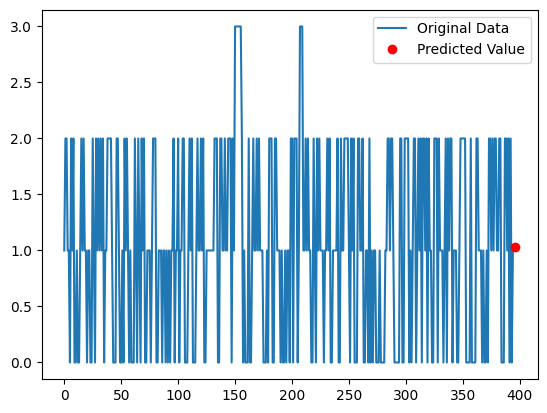

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample time series data (replace with your actual data)
data1_1= correct_indices +validation_correct_indices # Your sequence here

# Create a DataFrame with the data
df = pd.DataFrame(data1_1, columns=['value'])

# Define ARIMA model with adjusted order
model = ARIMA(df['value'], order=(1, 0, 1))  # Adjust the order as needed

model_fit = model.fit()

# Predict the next value
forecast = model_fit.get_forecast(steps=1)
next_value = forecast.predicted_mean.values[0]

print("Predicted Next Value:", next_value)


# Plot the original data and predicted value
plt.plot(df['value'], label='Original Data')
plt.plot(len(df), next_value, 'ro', label='Predicted Value')
plt.legend()
plt.show()



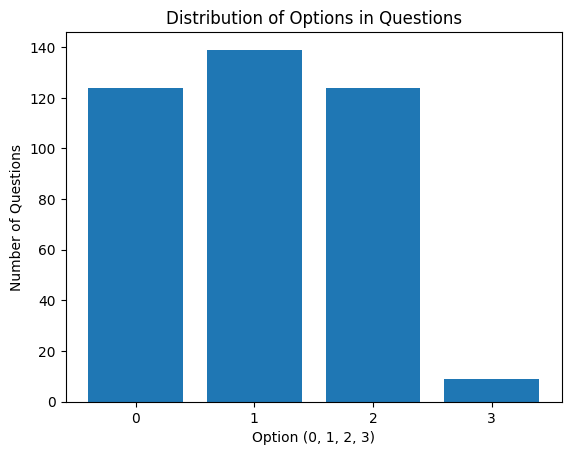

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data11 = correct_indices + validation_correct_indices # Your sequence of options (0, 1, 2, 3)

# Create a DataFrame with the data
df11 = pd.DataFrame(data11, columns=['option'])

# Count the occurrences of each option (0, 1, 2, 3) in the dataset
option_counts = df11['option'].value_counts().sort_index()

# Create a bar graph
plt.bar(option_counts.index, option_counts.values)
plt.title('Distribution of Options in Questions')
plt.xlabel('Option (0, 1, 2, 3)')
plt.ylabel('Number of Questions')
plt.xticks(option_counts.index)  # Ensure all options are shown on the x-axis
plt.show()


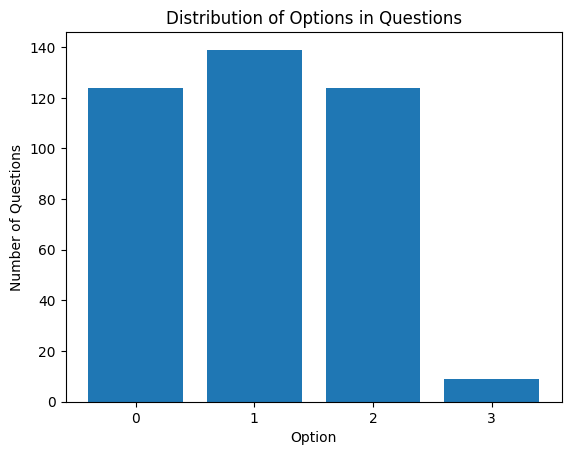

In [ ]:
options = [0, 1, 2, 3]

# Create a bar graph with explicit labels
plt.bar(options, option_counts)
plt.title('Distribution of Options in Questions')
plt.xlabel('Option')
plt.ylabel('Number of Questions')
plt.xticks(options)  # Set explicit labels on the x-axis
plt.show()

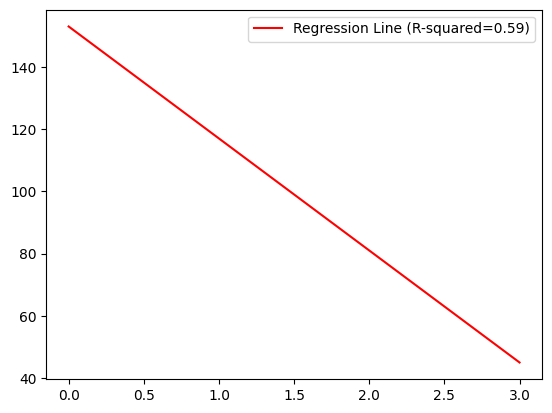

In [ ]:
# Calculate and plot a linear regression line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(options, option_counts)
plt.plot(options, slope * np.array(options) + intercept, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.legend()

plt.show()

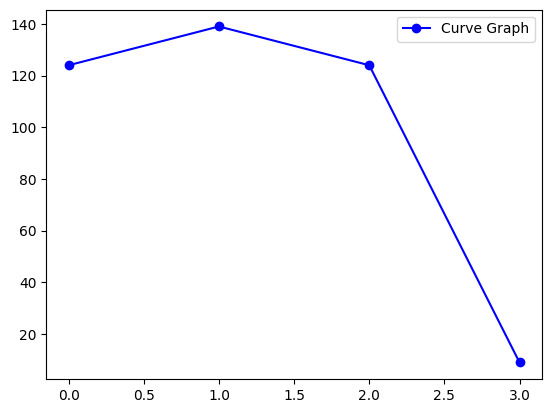

In [ ]:
# Create a curve graph along x and y-axis
x = options
y = option_counts
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Curve Graph')

# Show legends for both bar and curve graphs
plt.legend()

plt.show()

In [ ]:
from textblob import TextBlob
neu=0
pos=0
neg=0
for question in questions+ validation_questions:
    text = question
    blob = TextBlob(text)
    sentiment = blob.sentiment

    if sentiment.polarity > 0:
        sentiment_label = "positive"
        pos+=1
    elif sentiment.polarity < 0:
        sentiment_label = "negative"
        neg+=1
    else:
        sentiment_label = "neutral"
        neu+=1

    print(f"Sentiment: {sentiment_label}, Polarity: {sentiment.polarity}")
print(f"Positive: {pos}, Negative: {neg}, Neutral: {neu}")


Sentiment: negative, Polarity: -0.13333333333333333
Sentiment: negative, Polarity: -0.13333333333333333
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: positive, Polarity: 0.5
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: negative, Polarity: -0.1
Sentiment: negative, Polarity: -0.1
Sentiment: negative, Polarity: -0.1
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: neutral, Polarity: 0.0
Sentiment: positive, Polarity: 0.5
Sentiment: positive, Polarity: 0.5
Sentiment: positive, Polarity: 0.5
Sentiment: positive, Polarity: 0.16666666666666669
Sentiment: positive, Polarity: 0.11111111111111112
Sentiment: positive, Polarity: 0.11111111111111112
Sentiment: neutral, Polarity: 0.0
Sentiment: positive, Polarity: 0.25
Sentiment: neutra

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample data
texts = questions + validation_questions
labels = correct_indices + validation_correct_indices

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train a classifier (Multinomial Naive Bayes in this case)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.3625
              precision    recall  f1-score   support

           0       0.35      0.29      0.32        24
           1       0.38      0.59      0.46        29
           2       0.33      0.20      0.25        25
           3       0.00      0.00      0.00         2

    accuracy                           0.36        80
   macro avg       0.27      0.27      0.26        80
weighted avg       0.35      0.36      0.34        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from gensim import corpora, models

# Sample data (list of documents)
documents = questions

# Tokenize and create a dictionary
tokenized_docs = [doc.split() for doc in documents]
dictionary = corpora.Dictionary(tokenized_docs)

# Create a corpus (bag of words)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Build an LDA model (Latent Dirichlet Allocation)
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary)

# Get the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.042*"What" + 0.041*"the" + 0.039*"of" + 0.033*"a" + 0.033*"is"')
(1, '0.026*"What" + 0.024*"the" + 0.019*"in" + 0.018*"you" + 0.017*"do"')
